# Projeto Iris

Usaremos os dados do dataset Iris, que já é um dos dataset base do sklearn para fazer testes.

**Importando bibliotecas**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [17]:
#Atributos
X = pd.DataFrame(data.data,columns=data.feature_names)
#Variável Dependente
y= pd.DataFrame(data.target, columns = ['Species'])

In [32]:
df = pd.concat([X,y],axis=1)

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pelo propósito de Análise exploratória dos dados, farei uma substituição de qual espécie é qual, fazendo um replace dos valores para identificarmos com mais facilidade o que é característica de qual espécie.

In [36]:
replace = {
    0:'setosa',
    1:'versicolour',
    2:'virginica'
}

In [37]:
df['Species'] = df['Species'].replace(replace)

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
df['Species'].value_counts()

setosa         50
versicolour    50
virginica      50
Name: Species, dtype: int64

Inicialmente vemos aqui que o dataset apresenta a mesma quantidade de registro para cada espécie, então existe um balanceamento no dataset em relação as quantidade.

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Com o describe conseguimos ver os valores médios, mediana, descio padrão associado com cada atributos do dataset.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Com o método info verificamos se existe algum valor nulo no dataset, e aparentemente pelo resultado, estamos sem valores nulos.

### Análise pelos gráficos

In [46]:
sns.set_style('darkgrid')

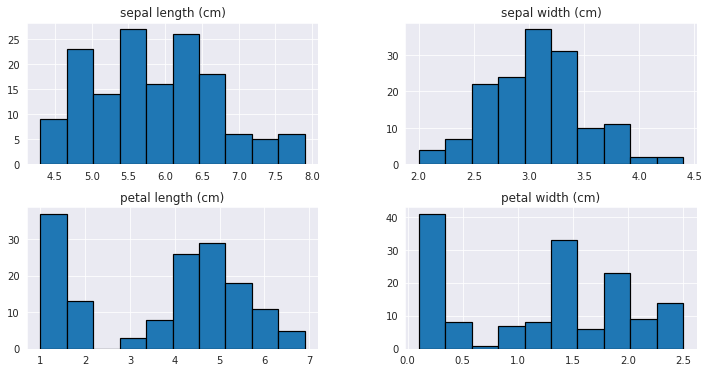

In [63]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0, 0.5, 'Comprimento da Sépala (cm)')

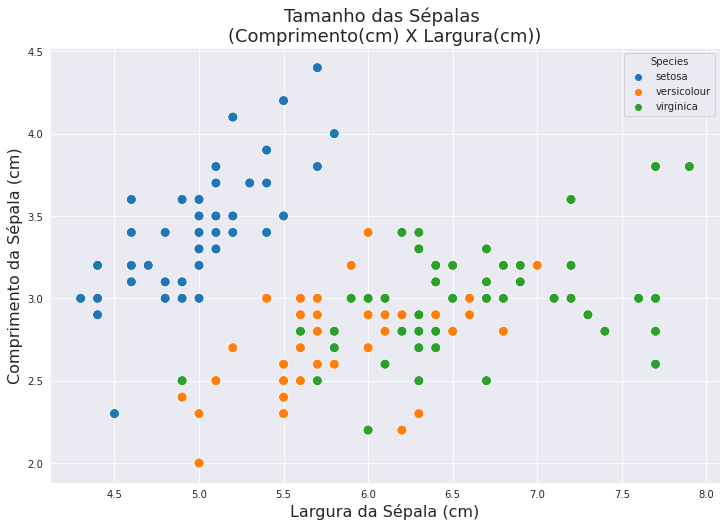

In [83]:
plt.figure(figsize=(12,8))
plt.title('Tamanho das Sépalas \n(Comprimento(cm) X Largura(cm))',fontsize=18)
fig=sns.scatterplot(data=df,x=df['sepal length (cm)'],y=df['sepal width (cm)'],
                    hue=df['Species'],s=(100))
plt.xlabel('Largura da Sépala (cm)', fontsize=16)
plt.ylabel('Comprimento da Sépala (cm)', fontsize=16)

Daqui é possível ver que a espécie da Iris Setosa, apresenta as menores larguras de sépala e os maiores comprimentos de sépala.

Já a espécie Virginica apresenta as maiores larguras de sépala, mas tanto a Versicolour e a Virginica apresentam comprimentos parecidos.

Text(0, 0.5, 'Comprimento da Pétala (cm)')

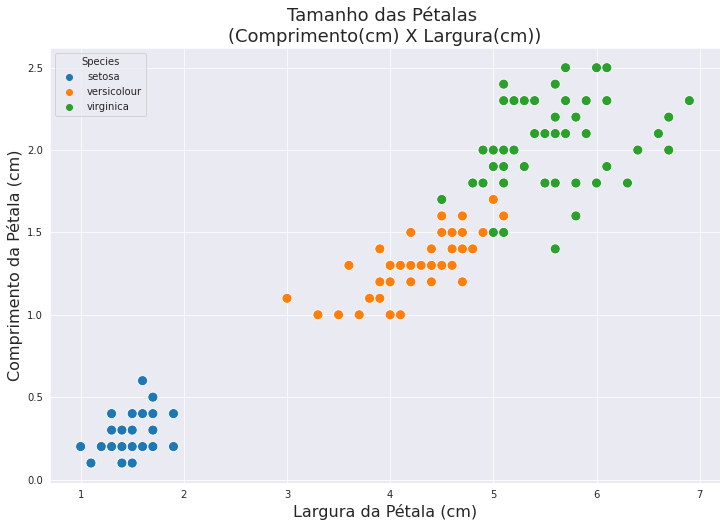

In [85]:
plt.figure(figsize=(12,8))
plt.title('Tamanho das Pétalas \n(Comprimento(cm) X Largura(cm))',fontsize=18)
fig=sns.scatterplot(data=df,x=df['petal length (cm)'],y=df['petal width (cm)'],
                    hue=df['Species'],s=(100))
plt.xlabel('Largura da Pétala (cm)', fontsize=16)
plt.ylabel('Comprimento da Pétala (cm)', fontsize=16)

Já quando se tratando de tamanho das pétalas, é possível ver que a setosa apresenta as menores pétalas, tanto em largura quanto em comprimento, e logo em seguida em ordem, temos a versicolour com a pétalas de tamanho médio e a Virginica com as maiores pétalas.

Podemos também ver através de boxplot, pontos mais individuais.

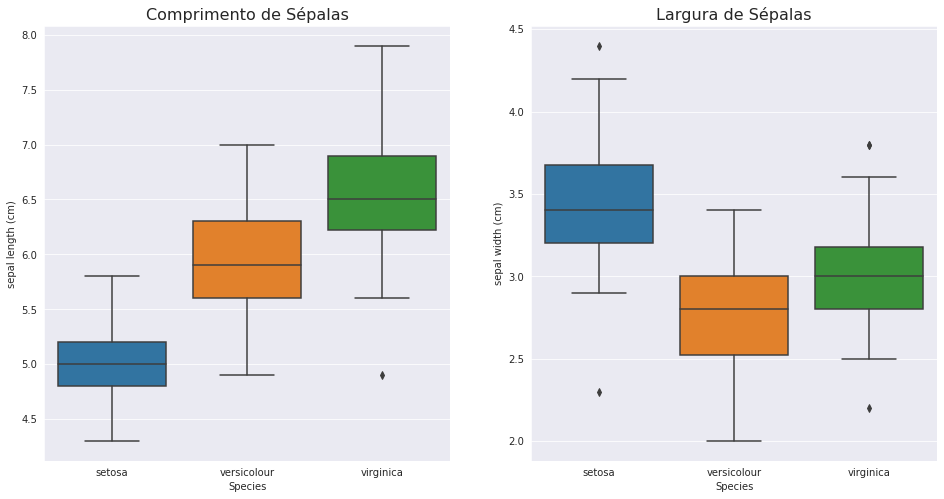

In [103]:
plt.subplots(1,2)
plt.subplot(1,2,1)
fig = sns.boxplot(data=df,y=df['sepal length (cm)'],x=df['Species'])
fig.set_title('Comprimento de Sépalas',fontsize=16)
plt.subplot(1,2,2)
fig = sns.boxplot(data=df,y=df['sepal width (cm)'],x=df['Species'])
fig.set_title('Largura de Sépalas',fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16,8)

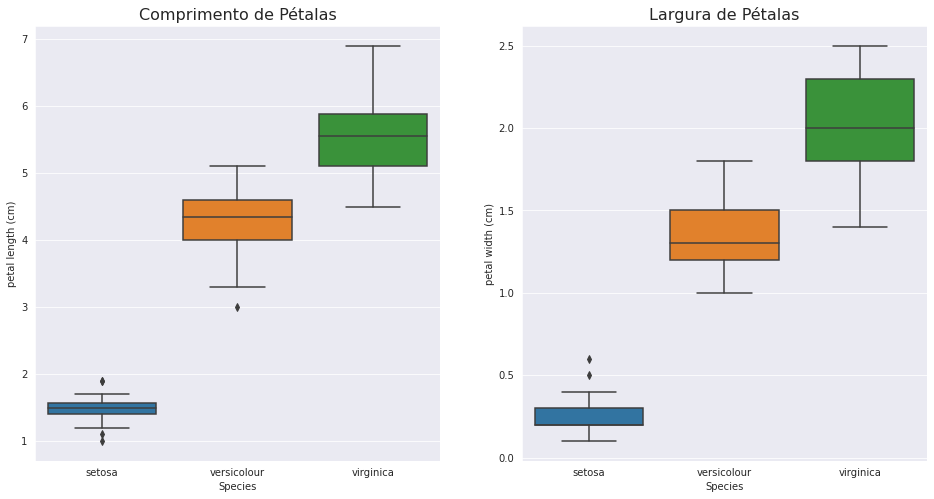

In [104]:
plt.subplots(1,2)
plt.subplot(1,2,1)
fig = sns.boxplot(data=df,y=df['petal length (cm)'],x=df['Species'])
fig.set_title('Comprimento de Pétalas',fontsize=16)
plt.subplot(1,2,2)
fig = sns.boxplot(data=df,y=df['petal width (cm)'],x=df['Species'])
fig.set_title('Largura de Pétalas',fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16,8)

Da mesma forma que anteriormente, pelos gráficos de dispersão, podemos chegar na mesma conclusão referente as características de cada espécie.

---

Posso fazer uma última análise em relação a correção entre os atributos

<Axes: >

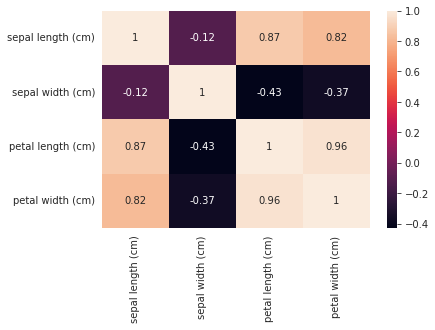

In [110]:
sns.heatmap(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr(), annot=True)

Por esse mapa de calor com os atributos, temos que as sépalas não são tão bem correlacionadas, porém as medidas de pétalas são muito correlacionadas entre si. Sendo esse o caso, podemos analisar com ou sem os dois atributos de pétalas quando formos tratar dos modelos de predição.

Com isso podemos finalizar com o caderno de análise exploratória.